# LAB 9 : Write a program to implement the Hierarchical Agglomerative Clustering Algorithm 

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# import dataset
dataset = pd.read_csv("BMI.csv")

In [21]:
# dimension of dataset
dataset.shape

(5000, 5)

In [22]:
# info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  5000 non-null   float64
 1   Gender  5000 non-null   object 
 2   BMI     5000 non-null   float64
 3   Age     5000 non-null   int64  
 4   Height  5000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB


In [23]:
# Selecting data using iloc based on integer positions
X = dataset.iloc[:,[3,4]].values

In [24]:
print(X)

[[59.          1.76024951]
 [25.          1.59549871]
 [50.          1.81653831]
 ...
 [26.          1.91597796]
 [55.          1.75152494]
 [22.          1.78998408]]


### Using the dendrogram to find the optimal number of clusters

Text(0, 0.5, 'Euclidean Distance')

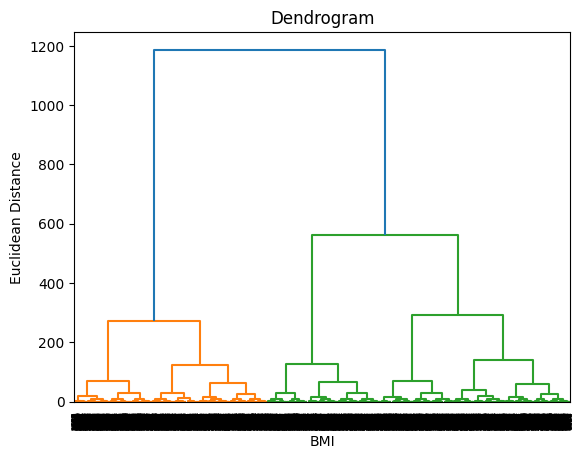

In [39]:
import scipy.cluster.hierarchy as sch

# Perform hierarchical/agglomerative clustering on the dataset X using Ward's method
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# Set the title of the dendrogram plot
plt.title("Dendrogram")

# Label the x-axis as "Customer"
plt.xlabel("BMI")

# Label the y-axis as "Euclidean Distance"
plt.ylabel("Euclidean Distance")

### Training the Hierarchical Clustering model on the dataset

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object with 5 clusters, using Euclidean distance and Ward's linkage
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the hierarchical clustering model to the dataset X and predict the cluster labels
y_hc = hc.fit_predict(X)

In [27]:
print(y_hc)

[4 2 1 ... 2 1 2]


### Visualising the clusters

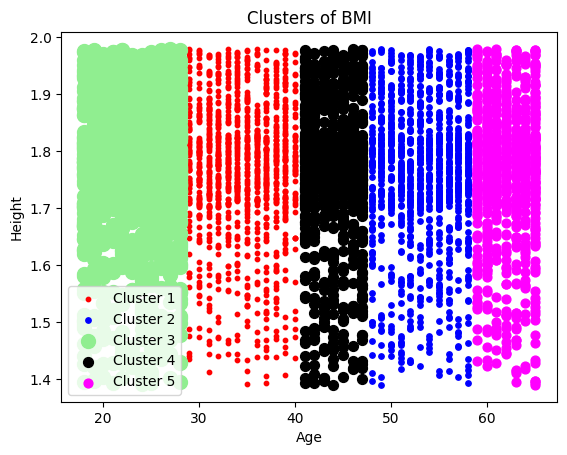

In [38]:
# Plotting the points in the first cluster with red color and label 'Cluster 1'
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 10, c = 'red', label = 'Cluster 1')

# Plotting the points in the second cluster with blue color and label 'Cluster 2'
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 15, c = 'blue', label = 'Cluster 2')

# Plotting the points in the third cluster with light green color and label 'Cluster 3'
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')

# Plotting the points in the fourth cluster with black color and label 'Cluster 4'
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=  50, c = 'black', label = 'Cluster 4')

# Plotting the points in the fifth cluster with magenta color and label 'Cluster 5'
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 40, c = 'magenta', label = 'Cluster 5')

# Setting the title of the plot
plt.title('Clusters of BMI')

# Labeling the x-axis as 'Age'
plt.xlabel('Age')

# Labeling the y-axis as 'Height'
plt.ylabel('Height')

# Displaying the legend to show which color corresponds to which cluster
plt.legend()

# Displaying the plot
plt.show()